In [1]:
import numpy as np
import scipy.integrate as sp
import matplotlib.pyplot as plt

In [214]:
dd

In [2]:
###
#this lets R_0 enter as a paramater. You have to write an equation for dR_0/dt which is a little 
#goofy and can explode if you set it too high
###
def seir(init, t, s, g):
    S, E, I, R, R_0 = init

    b = R_0 * g #day^-1,
    dR_0 = 0 

    dS = (-b * S * I)
    dE = ( b * S * I) - (s * E)
    dI = (s * E) - (g * I)
    dR = (g * I)
    return dS, dE, dI, dR, dR_0

# set constants
g = 1/4 #day^-1, recovery rate
s = 1/3 #day^-1, incubation


#set initial conditions
I0 = 0
E0 = 0.001
R0 = 0
S0 = 1 - I0 - E0 - R0
R_00 = 1.5

init = S0, E0, I0, R0, R_00 #pass in R_00

#build time step array
tstop = 40 #days
tstep = 10 * tstop
t = np.linspace(0, tstop, tstep) 


sol = sp.odeint(seir, init, t, args = (s, g, ))

In [47]:
###
#this is more of a lookup table aproach. You make R_0(t) and pass it in. It gets a bit messy seeing what time step
#is close so that happens in a function
###

from scipy import signal

def R_0f(t, R_0t):
    idx = (np.abs(R_0t[:, 0] - t)).argmin()
    return R_0t[idx, 1]
    
    
    
    
def seir(init, t, s, g, R_0t):
    S, E, I, R = init

    b = R_0f(t, R_0t) * g #day^-1, 

    dS = (-b * S * I)
    dE = ( b * S * I) - (s * E)
    dI = (s * E) - (g * I)
    dR = (g * I)
    return dS, dE, dI, dR


#build time step array
tstop = 400 #days
tstep = 10 * tstop
timearr = np.linspace(0, tstop, tstep) 

# set constants
g = 1/4 #day^-1, recovery rate
s = 1/3 #day^-1, incubation



#set initial conditions
I0 = 0
E0 = 0.001
R0 = 0
S0 = 1 - I0 - E0 - R0
R_00 = 1.5

init = S0, E0, I0, R0 




Text(0.5, 0, 'time (days)')

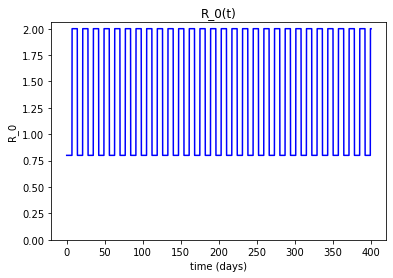

In [56]:
###
#modulate R(t)
###
tp = np.pi * 2
RmodPeriod = 14 #days
RmodPhaseTotal = 0 * np.pi #radians (Cue: steven looses his mind)
RmodPhaseDiff =  1 * np.pi #radians
R_01Amp = .8
R_02Amp = 2
R_01Duty = .5
R_02Duty = .5

R_01arg = tp / RmodPeriod * timearr - RmodPhaseTotal
R_02arg = tp / RmodPeriod * timearr - RmodPhaseTotal - RmodPhaseDiff
R_01 = (signal.square(R_01arg, duty = R_01Duty) + 1) / 2 # +1/2 to shift from [-1,1] to [0,1]
R_02 = (signal.square(R_02arg, duty = R_02Duty) + 1) / 2

R0_temp = (R_01Amp * R_01 + R_02Amp * R_02)

R_0t = np.vstack((timearr, R0_temp)).T
#print(R_0t)

plt.plot(R_0t[:, 0], R_0t[:, 1], 'b')
plt.ylim(bottom = 0);
plt.title("R_0(t)")
plt.ylabel("R_0")
plt.xlabel('time (days)')

In [57]:
sol = sp.odeint(seir, init, timearr, args = (s, g, R_0t))

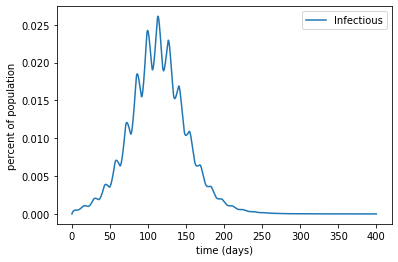

In [58]:
plt.figure(1)
#plt.plot(timearr, sol[:, 0], label = 'Susceptible')
#plt.plot(timearr, sol[:, 1], label = 'Exposed')
plt.plot(timearr, sol[:, 2], label = 'Infectious')
#plt.plot(timearr, sol[:, 3], label = 'Recovered')
#plt.plot(timearr, R_0t[:, 1], label = 'R_0')
plt.xlabel('time (days)')
plt.ylabel('percent of population')
plt.legend()

In [34]:
'''
y = np.zeros(4) # S, E, I, R
y[0] = .99 #Susceptible
y[1] = 0 #Exposed
y[2] = .01 #Infectious
y[3] = 0 #Recovered



tstop = 1000 #days
tstep = 10 * tstop
t = np.linspace(0, tstop, tstep) 
'''

'\ny = np.zeros(4) # S, E, I, R\ny[0] = .99 #Susceptible\ny[1] = 0 #Exposed\ny[2] = .01 #Infectious\ny[3] = 0 #Recovered\n\n\n\ntstop = 1000 #days\ntstep = 10 * tstop\nt = np.linspace(0, tstop, tstep) \n'

In [ ]:
'''
#build r time dependance for non coupled r
r = {}
for i, time in enumerate(t):
    r[str(time)] = 2*np.sin(t[i]/5)**2
#rList = [r[time] for time in t]
r

rList = (2*np.sin(t/5))**2
'''

In [ ]:
sol